# 네이버 영화 리뷰 수집

In [14]:
import time
import requests as req
from tqdm import tqdm as tq
from bs4 import BeautifulSoup as bs

h = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

In [5]:
review_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=37886&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'

review_res = req.get(review_url, headers = h)
html = bs(review_res.text, 'lxml')

In [9]:
# 10건의 리뷰데이터를 출력하시오.
review_html =html.select('div.score_reple>p>span')

In [10]:
len(review_html)

10

In [12]:
for i in range(len(review_html)):
     print(review_html[i].text.strip()) # strip() =>  줄 사이 공백을 줄여주는 함수

이 영화를 보고 암이 나았습니다.
이것은절대1점이아니다11점을주고싶은 내마음이다
모니터도 울고 외장하드도 울고 숨어있던 바이러스도 울었다
당신이 이 영화를 보지 않았다면  아직 살아있을 이유 하나를 간직하고 있는 것이다.
영화계엔 BC와 AC가 있다. Before Clementain, After Clementain...
남친 집에서 클레멘타인 DVD를 발견했고, 결혼을 결심했습니다.
드디어 보았네요. 나이 40대 중반에 이런 감동을 느낄 수 있음에 스스로도 대견한 생각이 듭니다. 먼 훗날 제 아이들도 이 영화를 보고 저와 같은 감동을 느끼길 바라는 건 그저 바램이겠지요?
평점깍아내리는 낚시글 몇개있는데 제발그만해라 이기적인새끼들아좋은건 나누는거다
장난으로 쓰지마라... 본인은 2004년에 실제로 극장에서 이 영화를 봤다
프로포즈 선물로 다이아반지 대신 클레멘타인 파일을 USB에담아 목걸이로 만들어 그녀 목에 걸어주었다. 눈물로 대신 대답한 그녀...그리고 2세이름은 그녀의 의견을 반영해 이동준과 스티븐시갈의 이름을 딴 이동갈로 지을...


# 모든 페이지의 리뷰수집

In [33]:
f = open('review_data.txt','w')


for pageNo in tq(range(1,2299)):
     #print('-'*30, '페이지번호:{}'.format(pageNo), '-'*30)
    review_res = req.get(review_url+'&page={}'.format(pageNo), headers=h)
    html = bs(review_res.text, 'lxml')
    
    review_html =html.select('div.score_reple>p>span')
    
    for i in range(len(review_html)):
        #print(review_html[i].text.strip())
        f.write(review_html[i].text.strip())
    
    #time.sleep(1)
    
f.close() # 파일저장완료

  2%|█▍                                                                              | 43/2298 [00:04<03:40, 10.22it/s]


KeyboardInterrupt: 

# 파일저장/읽기

In [18]:
f = open('test.txt','w')
f.write('Hello Python!')
f.close()

In [20]:
f = open('test.txt','r')
data = f.read()
f.close()
print(data)

Hello Python!


# 영화리뷰 텍스트파일 읽어오기

In [34]:
f = open('review_data.txt', 'r')
data = f.read()
f.close()

print(data)

이 영화를 보고 암이 나았습니다.이것은절대1점이아니다11점을주고싶은 내마음이다모니터도 울고 외장하드도 울고 숨어있던 바이러스도 울었다당신이 이 영화를 보지 않았다면  아직 살아있을 이유 하나를 간직하고 있는 것이다.영화계엔 BC와 AC가 있다. Before Clementain, After Clementain...남친 집에서 클레멘타인 DVD를 발견했고, 결혼을 결심했습니다.드디어 보았네요. 나이 40대 중반에 이런 감동을 느낄 수 있음에 스스로도 대견한 생각이 듭니다. 먼 훗날 제 아이들도 이 영화를 보고 저와 같은 감동을 느끼길 바라는 건 그저 바램이겠지요?평점깍아내리는 낚시글 몇개있는데 제발그만해라 이기적인새끼들아좋은건 나누는거다장난으로 쓰지마라... 본인은 2004년에 실제로 극장에서 이 영화를 봤다프로포즈 선물로 다이아반지 대신 클레멘타인 파일을 USB에담아 목걸이로 만들어 그녀 목에 걸어주었다. 눈물로 대신 대답한 그녀...그리고 2세이름은 그녀의 의견을 반영해 이동준과 스티븐시갈의 이름을 딴 이동갈로 지을...내가 가장 부러운 사람은 이영화를 아직 보지않은 사람이다.. 보기전으로 돌아가 그때에 느꼈던 감동을 다시 느끼고싶다...난 8년째 아침 알람소리는 "아빠~일어나~~!!!" 이다..........난 매일 아침을 상쾌한 눈물로 하루를 시작한다............,신은 인간을 만들었고, 인간은 클레멘타인을 만들었다.저는 앉은뱅이입니다. 너무 감동받고 아빠 일어나! 에서 전 직립보행을 했습니다.네이버평점보고 영화뭐볼까 진짜고민하다 황금같은 일요일 클레멘타인을 선택하였다 후회는없다한강물의 10%는 이영화보고 사람들이흘린눈물이라던데 처음엔 장난이겟지햇는데 보고나니 이말이사실일지도모른다는생각우리집개도 이영화를 보고 참회의 눈물을 흘렸다~~!!!여성부에서 아빠만 일어나라고 했다고 성차별이라며 이 영화를 제지하지만 않았어도 2,000만 관객은 넘었을겁니다.10점밖에 줄 수 없다는게 슬픈영화. 영화제작을 꿈꾸는 이들에게 교과서같은 명화.다시 한번 임진왜란이 일

# 워드클라우드 그리기

In [36]:
# !pip install 설치할 라이브러리 --> 최신버전

# 특정버전의 라이브러리 설치해야 할 경우
#!pip install 설치할 라이브러리==버전

!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\smhrd\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\smhrd\\AppData\\Local\\Temp\\pip-install-6rj2sz1e\\wordcloud_842b41bf30dc42158ea19cb2c8ec2e42\\setup.py'"'"'; __file__='"'"'C:\\Users\\smhrd\\AppData\\Local\\Temp\\pip-install-6rj2sz1e\\wordcloud_842b41bf30dc42158ea19cb2c8ec2e42\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\smhrd\AppData\Local\Temp\pip-wheel-3uy2vnbu'
       cwd: C:\Users\smhrd\AppData\Local\Temp\pip-install-6rj2sz1e\wordcloud_842b41bf30dc42158ea19cb2c8ec2e42\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

!pip install 설치오류 시 해결방법<br>
1. anaconda prompot 실행
2. conda install -c conda-forge wordcloud 명령어 입력
3. 설치 도중 'y' 명령어 입력
4. 설치완료 후 jupyter 셀에 라이브러리추가 하기 명령어 입력

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [54]:
# 불용어 처리
stopword = set(STOPWORDS)
stopword.add('영화')
stopword.add('이')
stopword.add('영화를')
stopword.add('보고')
stopword.add('진짜')

In [56]:
wc = WordCloud(
    font_path = 'C:/Windows/Fonts/malgunbd.ttf', background_color = 'white',
    stopwords=stopword
).generate(data)
wc.words_

{'정말': 1.0,
 '영화는': 0.7974910394265233,
 '클레멘타인': 0.7670250896057348,
 '이영화를': 0.7526881720430108,
 '최고의': 0.7455197132616488,
 '클레멘타인을': 0.6845878136200717,
 '아빠 일어나': 0.6594982078853047,
 '그': 0.6236559139784946,
 '영화가': 0.6200716845878136,
 '너무': 0.510752688172043,
 '다시': 0.5,
 '명작': 0.4838709677419355,
 '꼭': 0.4659498207885305,
 '이런': 0.4229390681003584,
 '내': 0.4175627240143369,
 '내가': 0.4032258064516129,
 '왜': 0.37992831541218636,
 '난': 0.3781362007168459,
 '나는': 0.3727598566308244,
 '눈물이': 0.34767025089605735,
 '인생 최고의': 0.34229390681003585,
 '영화입니다': 0.3172043010752688,
 '평점': 0.3154121863799283,
 '아': 0.3064516129032258,
 '제': 0.3046594982078853,
 '다': 0.2992831541218638,
 '더': 0.2974910394265233,
 '그리고': 0.2777777777777778,
 '감동': 0.27419354838709675,
 '영화의': 0.27060931899641577,
 '아직도': 0.27060931899641577,
 '이건': 0.27060931899641577,
 '10점': 0.25089605734767023,
 '아직': 0.24910394265232974,
 '볼 수': 0.23835125448028674,
 '전': 0.23655913978494625,
 '수 없는': 0.23476702508960573,

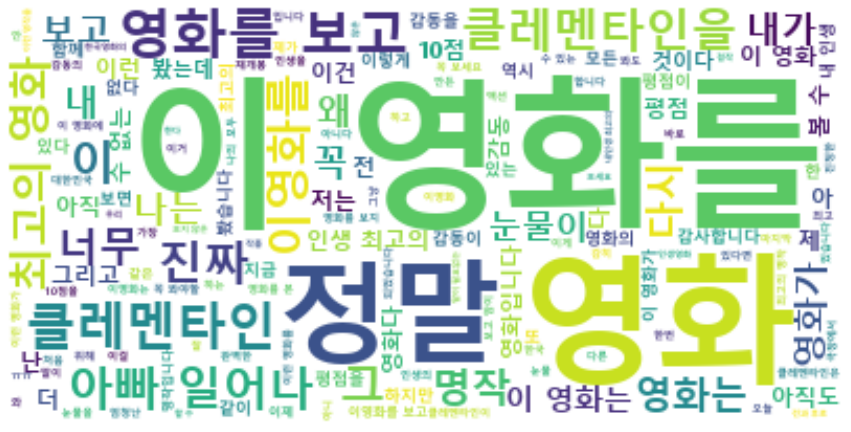

In [52]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation = 'bilinear')
plt. axis('off')
plt.show()